# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

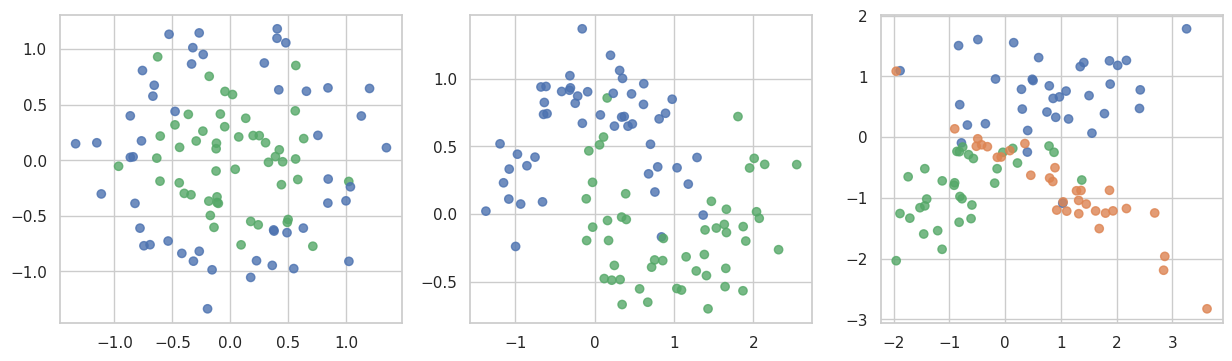

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

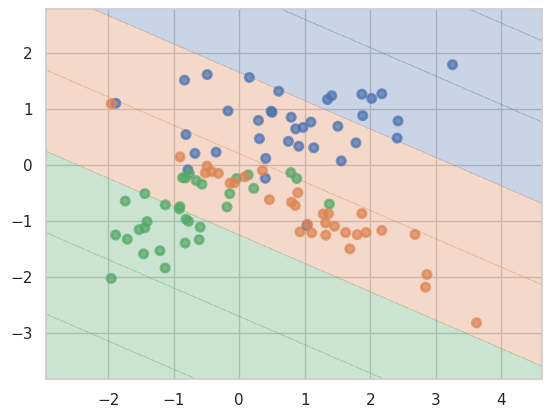

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

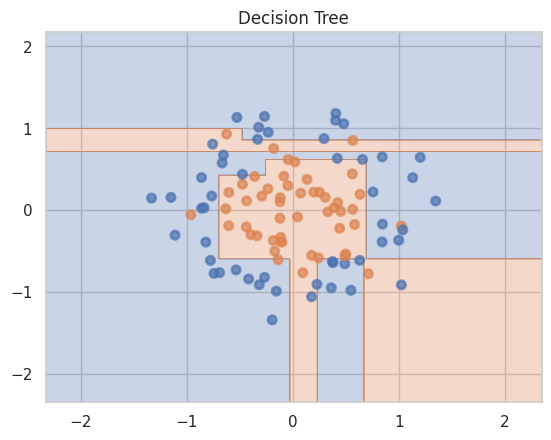

Train accuracy: 1.0
Test accuracy: 0.7666666666666667


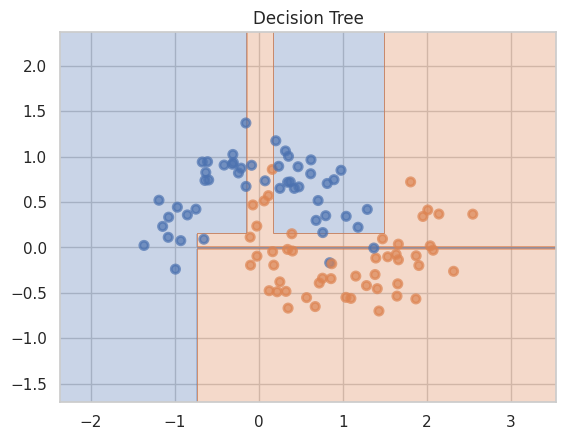

Train accuracy: 1.0
Test accuracy: 0.8666666666666667


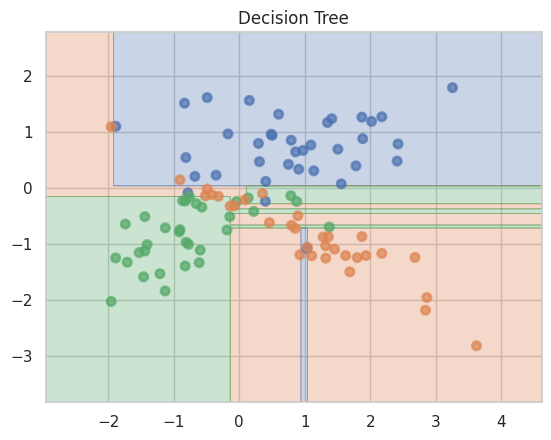

Train accuracy: 1.0
Test accuracy: 0.8


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    plot_surface(clf, X, y)
    plt.title("Decision Tree")
    plt.show()

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    print(f"Train accuracy: {train_acc}")
    print(f"Test accuracy: {test_acc}")


__Ответ:__ По всяким торчащим отросткам видно, что деревья переобучились (еще флаг то, что на трэйне акураси 1)

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Заколебался я с этим виджетом, убил на него несколько часов. Хотелось сделать три разных ползунка, но где-то пишут что такое можно (и предоставяляют нерабочий код), где-то пишут просто что [нельзя](https://stackoverflow.com/questions/71143764/plotly-adding-two-sliders-in-python) (вроде с помошью ipywidgets можно, но просят же plotly...). Получилось то, что получилось, результаты по итогу после задания.

In [ ]:
import plotly.graph_objects as go

def generate_decision_surface(clf, X, y):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    surface = go.Contour(
        z=Z,
        x=np.arange(x_min, x_max, plot_step),
        y=np.arange(y_min, y_max, plot_step),
        colorscale=[
            [0, "rgba(255, 200, 200, 0.5)"],
            [0.5, "rgba(200, 255, 200, 0.5)"],
            [1, "rgba(200, 200, 255, 0.5)"],
        ],
        showscale=False,
        line=dict(width=0)
    )

    scatter = go.Scatter(
        x=X[:, 0], y=X[:, 1],
        mode="markers",
        marker=dict(
            size=10,
            color=y,
            colorscale=["red", "green", "blue"],
            line=dict(width=1),
        ),
        name="Data Points"
    )

    return surface, scatter

def create_figure(max_depth, min_samples_leaf, dataset_index):
    X, y = datasets[dataset_index - 1]
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)

    surface, scatter = generate_decision_surface(clf, X_train, y_train)

    fig = go.Figure()
    fig.add_trace(surface)
    fig.add_trace(scatter)

    fig.update_layout(
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False),
        plot_bgcolor="white",
        margin=dict(l=50, r=50, t=50, b=50),
        width=800,
        height=600,
    )

    return fig

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
max_depth_range = [1, 2, 3, 4, 5, 7, 9]
min_samples_leaf_range = [1, 2, 3, 4, 5, 7, 9]
dataset_indices = [1, 2, 3]

frames = [
    go.Frame(
        name=f"{dataset_index}-{max_depth}-{min_samples_leaf}",
        data=create_figure(max_depth, min_samples_leaf, dataset_index).data
    )
    for dataset_index in dataset_indices
    for max_depth in max_depth_range
    for min_samples_leaf in min_samples_leaf_range
]

initial_fig = create_figure(1, 1, 1)
fig = go.Figure(data=initial_fig.data, layout=initial_fig.layout, frames=frames)

fig.update_layout(
    sliders=[
        dict(
            steps=[
                dict(
                    method="animate",
                    args=[
                        [f"{dataset_index}-{max_depth}-{min_samples_leaf}"],
                        dict(frame=dict(duration=0, redraw=True), mode="immediate")
                    ],
                    label=f"Dataset {dataset_index}, Depth {max_depth}, Min Leaf {min_samples_leaf}"
                )
                for dataset_index in dataset_indices
                for max_depth in max_depth_range
                for min_samples_leaf in min_samples_leaf_range
            ],
            currentvalue=dict(prefix="Parameters: ", font=dict(size=14)),
            x=0.05,
            len=0.9,
        )
    ]
)

fig.show()

__Ответ:__ При малой глубине получается полная ерунда, при повышении возникает желание переобучиться, но мы это хорошо контролируем минимальным числом листьев и видим, что это очень существенный регуляризатор, т.к. при 1 возникают разные лишние полосы, но при увеличении картина становится существенно лучше. Изменения для разных датасетов не одинаковые, так, 3 плоскости для третьего датасета продолжают гулять при повышении параметров, в то время как для первого получается весьма понятный прямоугольник.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py
https://contest.yandex.ru/contest/72492/run-report/129693400/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import find_best_split

df = pd.read_csv('students.csv')

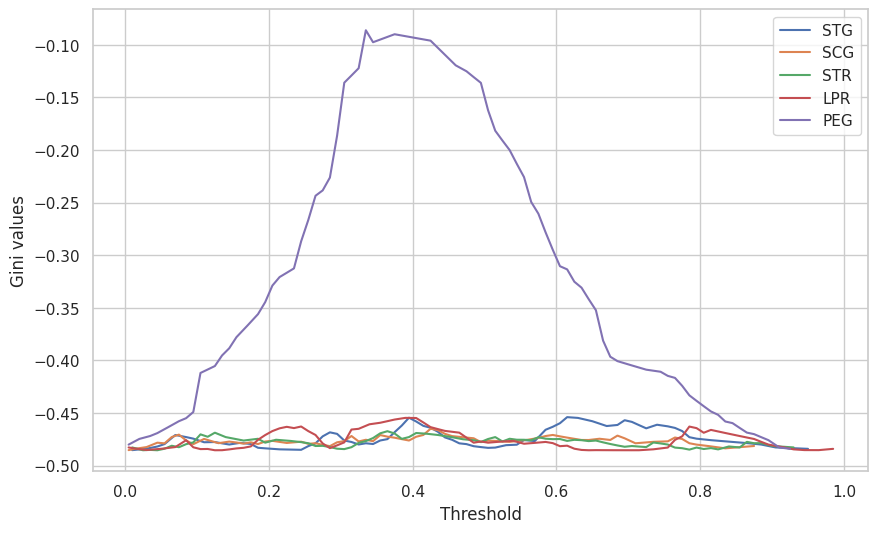

In [ ]:
plt.figure(figsize=(10, 6))
for name in ['STG', 'SCG', 'STR', 'LPR', 'PEG']:
    thresholds, ginis, _, _ = find_best_split(df[name], np.array(df.iloc[:, 5].values))
    plt.plot(thresholds, ginis, label=name)
plt.ylabel('Gini values')
plt.xlabel('Threshold')
plt.legend()
plt.show()

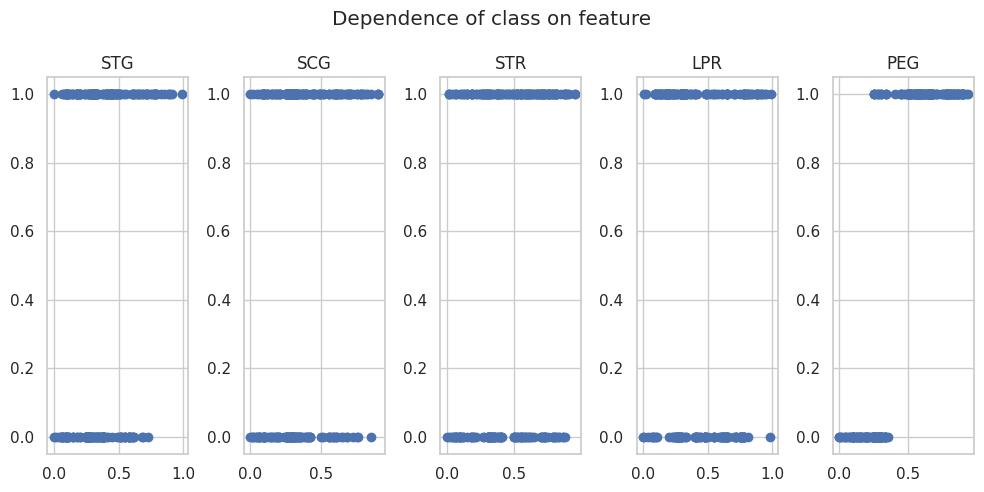

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=5, nrows=1)
for i in range(5):
    axes[i].scatter(df.iloc[:, i], df.iloc[:, 5])
    axes[i].set_title(df.columns[i])
plt.suptitle("Dependence of class on feature")
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление нужно производить по PEG, что видно и по scatter-графикам (можно увидеть, что хороший порог на scatter соответствует пику на первом графике). При этом, и на графиках с Джинни мы видим дсотаточно высокие значения, против дургих графиков (весьма смазанные, с небольшими значениями). Хорошие кривые это какие-нибудь вогнутые функции, с высокими значениями. Плохие это какие-нибудь шумовые "пилы".

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

 https://contest.yandex.ru/contest/72492/run-report/129693459/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import DecisionTree

df = pd.read_csv('agaricus-lepiota.data')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    df[column] = LabelEncoder().fit_transform(df[column])

X = df.drop(columns='p')
y = df['p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
tree = DecisionTree(['real'] * df.shape[1])
tree.fit(X_train.values, y_train.values)

print(f'Test accuracy = {accuracy_score(tree.predict(X_test.values), y_test.values)}')

Test accuracy = 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import DecisionTree

df = pd.read_csv('tic-tac-toe-endgame.csv')

In [ ]:
for column in df.columns:
    df[column] = LabelEncoder().fit_transform(df[column])

X = df.drop(columns='V10')
y = df['V10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
deeps = []
for max_depth in range(1, 10):
    tree = DecisionTree(["categorical"] * X_train.shape[1], max_depth=max_depth)
    tree.fit(X_train.values, y_train.values)
    y_pred = tree.predict(X_test.values)
    deeps.append(accuracy_score(y_test, y_pred))

In [ ]:
splits = []
for min_samples_split in range(2, 20):
    tree = DecisionTree(["categorical"] * X_train.shape[1], min_samples_split=min_samples_split)
    tree.fit(X_train.values, y_train.values)
    y_pred = tree.predict(X_test.values)
    splits.append(accuracy_score(y_test, y_pred))

In [ ]:
leaves = []
for min_samples_leaf in range(1, 20):
    tree = DecisionTree(["categorical"] * X_train.shape[1], min_samples_leaf=min_samples_leaf)
    tree.fit(X_train.values, y_train.values)
    y_pred = tree.predict(X_test.values)
    leaves.append(accuracy_score(y_test, y_pred))

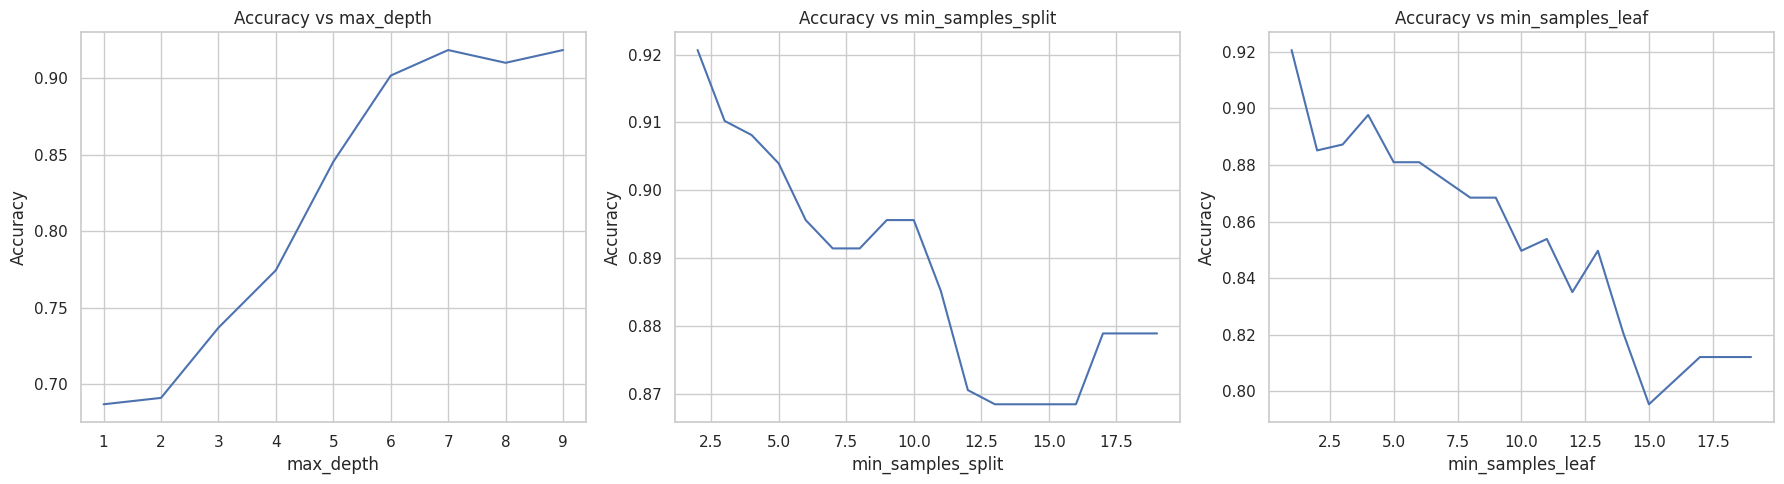

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(range(1, 10), deeps)
axes[0].set_title(f"Accuracy vs max_depth")
axes[0].set_xlabel("max_depth")
axes[0].set_ylabel("Accuracy")

axes[1].plot(range(2, 20), splits)
axes[1].set_title(f"Accuracy vs min_samples_split")
axes[1].set_xlabel("min_samples_split")
axes[1].set_ylabel("Accuracy")

axes[2].plot(range(1, 20), leaves)
axes[2].set_title(f"Accuracy vs min_samples_leaf")
axes[2].set_xlabel("min_samples_leaf")
axes[2].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

$$
\text{loss} = \frac{n_{\text{left}}}{n} \cdot \text{loss}_{\text{left}} + \frac{n_{\text{right}}}{n} \cdot \text{loss}_{\text{right}}
$$


__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from hw5code import LinearRegressionTree

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_x, X_val, train_y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
best_params = {}
best_mse = float('inf')

for max_depth in [7, 5, 3]:
    for min_samples_split in [2, 5, 10]:
        for min_samples_leaf in [1, 3, 5]:
            tree = LinearRegressionTree(
                feature_types=["real"] * X.shape[1],
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
            )
            tree.fit(train_x, train_y)
            y_pred = tree.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_params["max_depth"] = max_depth
                best_params["min_samples_split"] = min_samples_split
                best_params["min_samples_leaf"] = min_samples_leaf

tree = LinearRegressionTree(feature_types=["real"] * X.shape[1], **best_params)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best params for LinearRegressionTree:", best_params)
print("MSE:", mse)


Best params for LinearRegressionTree: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
MSE: 0.3890261636903149


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
}
regressor = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring="neg_mean_squared_error",
    cv=3
)
regressor.fit(X_train, y_train)

best_tree = regressor.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print("Best params DecisionTreeRegressor:", regressor.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_tree))


Best params DecisionTreeRegressor: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}
MSE: 0.4566841294623608


Видим, что бейзлайн выдает константы на участках, а потому такой способ выдает существенную ошибку. Наш способ, тем не менее, показывает себя достойно и я вполне заслуживает использования в проде.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

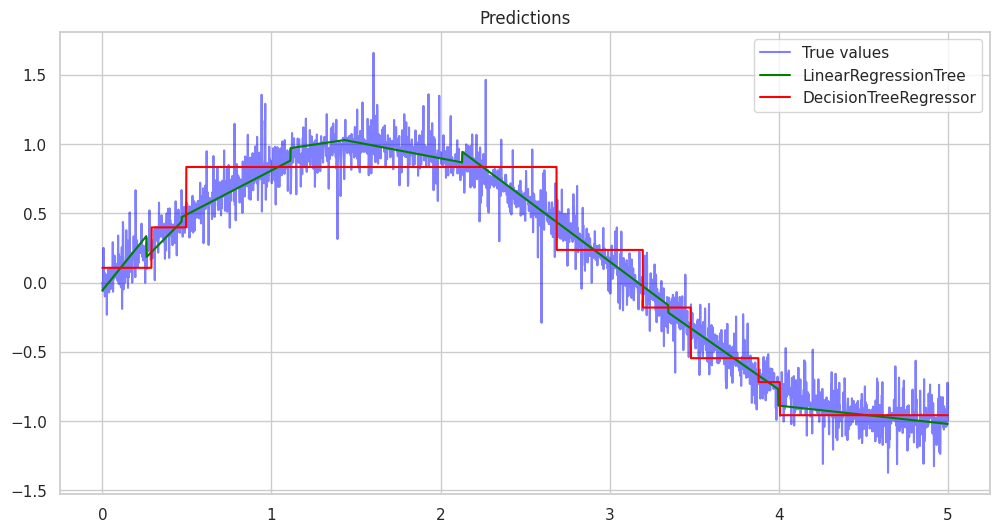

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE
tree = LinearRegressionTree(feature_types=["real"], **best_params)
tree.fit(x_train, y_train)
y_pred_linear = tree.predict(x)

sklearn_tree = DecisionTreeRegressor(**best_params)
sklearn_tree.fit(x_train, y_train)
y_pred_tree = sklearn_tree.predict(x)

plt.figure(figsize=(12, 6))
plt.plot(x.flatten(), y, label="True values", alpha=0.5, color="blue")
plt.plot(x.flatten(), y_pred_linear, label="LinearRegressionTree", color="green")
plt.plot(x.flatten(), y_pred_tree, label="DecisionTreeRegressor", color="red")
plt.legend()
plt.title("Predictions")
plt.show()

**Ответ:** Очевидным достоинством явялется то, что мы обгоняем бэйзлайн, при этом как будто бы мы выделяем главный тренд в кривой и игнорируем шум (мы хорошо приближаем дифференцируемую функцию синуса линейным приближением). Понятно, что недифференцированную функцию мы так хорошо не приблизим (но про такую гадость даже и говорить не хочется). В целом метод кажется довольно хорошим по качеству.

Недостатками является количество гиперпараметров и зависимоть от них. По хорошему их все надо кроссвалидировать, и для какого нибудь learning rate это сделать не так сложно, но для с каждым новым параметром время возрастает экспоненциально (к графику выше не относится, т.к. там подали уже посчитанные выше параметры).

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
print("     /\\")
print("    /  \\")
print("   /    \\")
print("  /______\\")
print(" /________\\")
print("/__________\\")
print("     ||")
print("     ||")
print("     ||")

     /\
    /  \
   /    \
  /______\
 /________\
/__________\
     ||
     ||
     ||
